# Local_Logistic_Regresion


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument 
import pandas as pd
import numpy as np
import nltk,gensim
import string,time,math,random,pickle
from operator import itemgetter
import matplotlib
from matplotlib import pyplot as plt

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/cnn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading data

In [10]:
with open('train.txt') as f:
    content = f.readlines()

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/cnn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocessing

In [ ]:
documents = []
label_list = []
lis_len = len(content)
dictionary = []
for line in content:
    count +=1
    labels, sentence = line.split('\t',1)
    sentence = sentence.lower()
    # removing links
    sentence =  ' '.join([x for x in sentence.split() if ('<' not in x) and ('\\' not in x)])
    # removing numbers and punctuations
    sentence = ''.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])
    text = sentence.split()
    # remove the stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text if ((word not in stopwords) and len(word)>2)])
    for label in labels.split(','):
        label = label.strip()
        dictionary.append(label)
        documents.append(text)
        label_list.append(label)

In [67]:
label_to_index = {}
Y_train = []
unique_labels = np.unique(dictionary)
for i in range(len(unique_labels)):
    label_to_index[unique_labels[i]] = i
for label in label_list:
    Y_train.append(label_to_index[label])
Y_train = np.array(Y_train)

In [63]:
Doc2Vec = TfidfVectorizer(max_features=300)
X = Doc2Vec.fit_transform(documents)

In [64]:
X_train = X.toarray()

In [65]:
X_train.shape

(298176, 300)

In [68]:
Y_train.shape

(298176,)

In [147]:
class SGD_Model():
    def __init__(self,learning_rate, learning_mode,batch_size,decay):
        self.learning_mode =learning_mode
        self.learning_rate = learning_rate 
        self.batch_size = batch_size
        self.decay = decay
        
    def _Compute_grad(self):         
        Z = self.X_batch.dot(self.W) #+ self.b
        Z -= Z.max(axis=1).reshape([-1, 1])
        self.y_hat = math.e**Z
        self.y_hat = self.y_hat/(self.y_hat.sum(axis=1).reshape([-1, 1]))   
        self.loss = (-np.log(self.y_hat[np.arange(len(self.y_hat)), self.y_batch]).sum())/ self.X_batch.shape[0]
        self.loss += 0.5 * 1e-6 * (self.W**2).sum()
        self.y_batch[np.arange(len(self.y_hat)), self.y_batch] -= 1
        self.dW = (self.X_batch.T.dot(self.y_hat) / self.X_batch.shape[0]) + (1e-6 * self.W)
    def train_model(self, X,y,epochs):
        m = X_train.shape[1]
        # Xazaviour initialization
        self.W = np.random.randn(m,50) / np.sqrt(m/2)
        itr_loss = []
        n_features = X.shape[1]
        n_classes = y.max() + 1
        W = np.random.randn(n_features, n_classes) / np.sqrt(n_features/2)
        for epoch in range(epochs):
            x_idx = random.sample(range(X.shape[0]), self.batch_size)
            self.X_batch = X[x_idx ]
            self.y_batch = y[x_idx ]
            self._Compute_grad()    
            if self.learning_mode == 'constant':
                self.W -= self.learning_rate * self.dW
            elif self.learning_mode == 'increasing':
                learning_rate *= (1. + self.decay * epoch)
                self.W -= self.learning_rate * self.dW  
            elif self.learning_mode == 'decreasing':
                self.learning_rate *= (1. / (1. + self.decay * epoch))
                self.W -= self.learning_rate * self.dW
            return W, itr_loss

# Constant learning rate 

In [129]:
model = SGD_Model(learning_rate= 1e-1, learning_mode= 'constant',batch_size= 1000,decay= 1e-8)

In [131]:
weight ,loss_1  = model.train_model(np.array(main_data),np.array(main_label),epochs=10)

# Decreasing learning rate with decay

In [145]:
model = SGD_Model(learning_rate= 1e-1, learning_mode= 'decreasing',batch_size= 1000,decay= 1e-8)
weight ,constant_loss_dec  = model.train_model(np.array(main_data),np.array(main_label),epochs=10)

# Increasing learning rate with factor

In [146]:
model = SGD_Model(learning_rate= 1e-1, learning_mode= 'increasing',batch_size= 1000,decay= 1e-8)
weight ,constant_loss_inc = model.train_model(np.array(main_data),np.array(main_label),epochs=10)

# Ploting the results

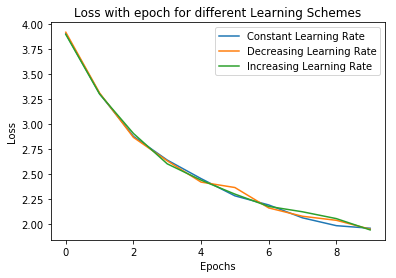

In [186]:
plt.plot(loss_1, label = 'Constant Learning Rate')
plt.plot(constant_loss_dec, label = 'Decreasing Learning Rate')
plt.plot(constant_loss_inc, label = 'Increasing Learning Rate')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss with epoch for different Learning Schemes')
plt.show()

In [173]:
y_hat = np.argmax(np.array(X.toarray()).dot(weight), 1)
sum1 = 0
for i, j in zip(y_hat  ,label_list):
    if index_2_lab[i] in j:
        sum1 +=1
print('Training Accuracy of the model : ', sum1*1.2/len(label_list)*100)

Training Accuracy of the model :  79.854695646916


# Reading Test data

In [174]:
with open('test.txt') as f:
    content = f.readlines()

In [175]:
documents = []
label_list = []
lis_len = len(content)
dictionary = []
for line in content:
    count +=1
    labels, sentence = line.split('\t',1)
    sentence = sentence.lower()
    # removing links
    sentence =  ' '.join([x for x in sentence.split() if ('<' not in x) and ('\\' not in x)])
    # removing numbers and punctuations
    sentence = ''.join([x for x in sentence if (x not in string.punctuation) and (not x.isdigit()) ])
    text = sentence.split()
    # remove the stop words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text if ((word not in stopwords) and len(word)>2)])
    for label in labels.split(','):
        label = label.strip()
        dictionary.append(label)
        documents.append(text)
        label_list.append(label)

In [176]:
label_to_index = {}
Y_test = []
unique_labels = np.unique(dictionary)
for i in range(len(unique_labels)):
    label_to_index[unique_labels[i]] = i
for label in label_list:
    Y_train.append(label_to_index[label])
Y_test = np.array(Y_test)

In [177]:
Doc2Vec = TfidfVectorizer(max_features=300)
X = Doc2Vec.fit_transform(documents)

# test accuracy

In [185]:
y_hat = np.argmax(np.array(X.toarray()).dot(weight), 1)
sum1 = 0
for i, j in zip(y_hat  ,label_list):
    if index_2_lab[i] in j:
        sum1 +=1
print('Test Accuracy of the model : ', sum1/len(label_list)*100)

Test Accuracy of the model :  73.86559347339731
